In [1]:
# DATASET LINK: https://www.kaggle.com/datasets/salader/dogs-vs-cats/code

In [2]:
import tensorflow as tf
import keras
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt

In [4]:
train = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/train",
    labels = "inferred",
    label_mode ="int",
    color_mode = "rgb",
    batch_size = 32,
    image_size = (256, 256),
)

validation = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/test",
    labels = "inferred",
    label_mode ="int",
    color_mode = "rgb",
    batch_size = 32,
    image_size = (256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
def process(img,label):
    img=tf.cast(img/255.0,tf.float32)
    print(img.shape)
    print(label.shape)
    return img,label
train=train.map(process)
validation=validation.map(process)

(None, 256, 256, 3)
(None,)
(None, 256, 256, 3)
(None,)


In [7]:
## Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
m1=model.fit(train,epochs=20,validation_data=validation)

Epoch 1/20


I0000 00:00:1752559712.359462     104 service.cc:148] XLA service 0x7c8f30017ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752559712.360057     104 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752559713.042989     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5030 - loss: 3.5813 

I0000 00:00:1752559718.808344     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.5876 - loss: 3.4510 - val_accuracy: 0.6558 - val_loss: 0.6141
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7177 - loss: 0.5496 - val_accuracy: 0.7554 - val_loss: 0.4994
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7788 - loss: 0.4661 - val_accuracy: 0.7556 - val_loss: 0.4992
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8177 - loss: 0.4018 - val_accuracy: 0.7820 - val_loss: 0.4566
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.8479 - loss: 0.3439 - val_accuracy: 0.7766 - val_loss: 0.4813
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8736 - loss: 0.2869 - val_accuracy: 0.8034 - val_loss: 0.4584
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9185 - loss: 0.1968 - val_accuracy: 0.7958 - val_loss: 0.5594
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9415 - loss: 0.1518 - val_accurac

In [14]:
model.evaluate(validation)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8045 - loss: 1.1411


[1.1084749698638916, 0.8145999908447266]

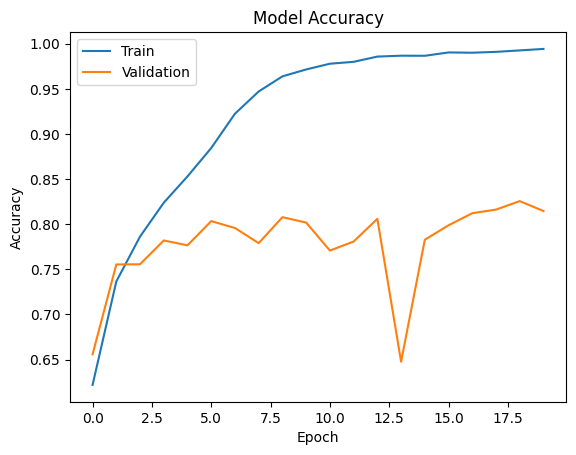

In [15]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

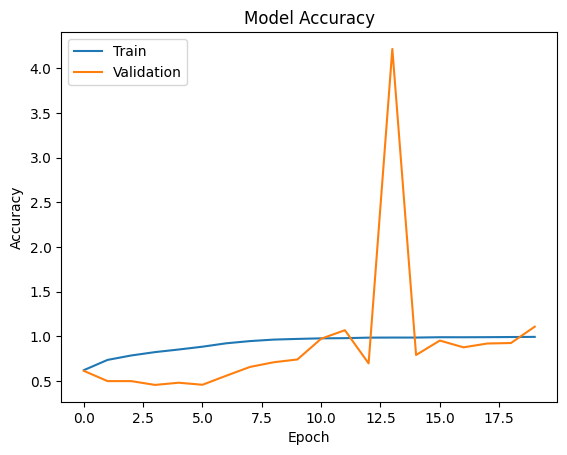

In [16]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your image
img_path = '/kaggle/input/dogs-vs-cats/test/cats/cat.10114.jpg'  # change to your image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))  # same size used during training
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# Predict using the already loaded model
prediction = model.predict(img_array)

# Output the result
if prediction[0][0] > 0.5:
    print("🐶 It's a Dog!")
else:
    print("🐱 It's a Cat!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
🐱 It's a Cat!


In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Image path (change this to your test image)
img_path = '/kaggle/input/dogs-vs-cats/test/cats/cat.10128.jpg' 

# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))  
img_array = image.img_to_array(img) / 255.0
img_array_expanded = np.expand_dims(img_array, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


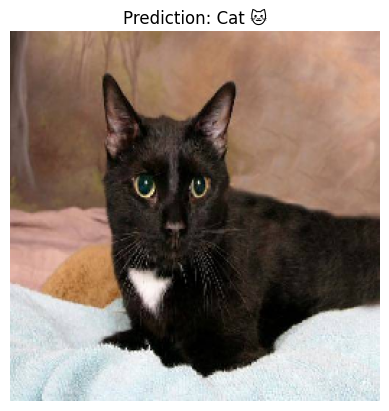

In [32]:
# Make prediction
prediction = model.predict(img_array_expanded)
label = "Dog 🐶" if prediction[0][0] > 0.5 else "Cat 🐱"

# Show image with prediction
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Image path (change this to your test image)
img_path = '//kaggle/input/dogs-vs-cats/test/dogs/dog.10054.jpg' 

# Load and preprocess the image
img = image.load_img(img_path, target_size=(256, 256))  
img_array = image.img_to_array(img) / 255.0
img_array_expanded = np.expand_dims(img_array, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


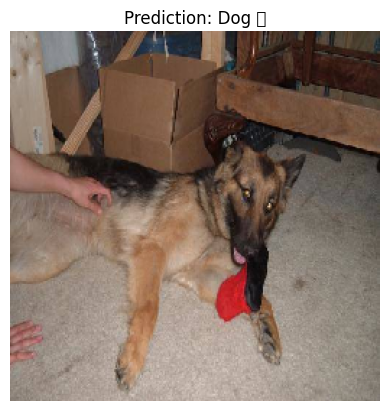

In [34]:
# Make prediction
prediction = model.predict(img_array_expanded)
label = "Dog 🐶" if prediction[0][0] > 0.5 else "Cat 🐱"

# Show image with prediction
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()